<IPython.core.display.Javascript object>


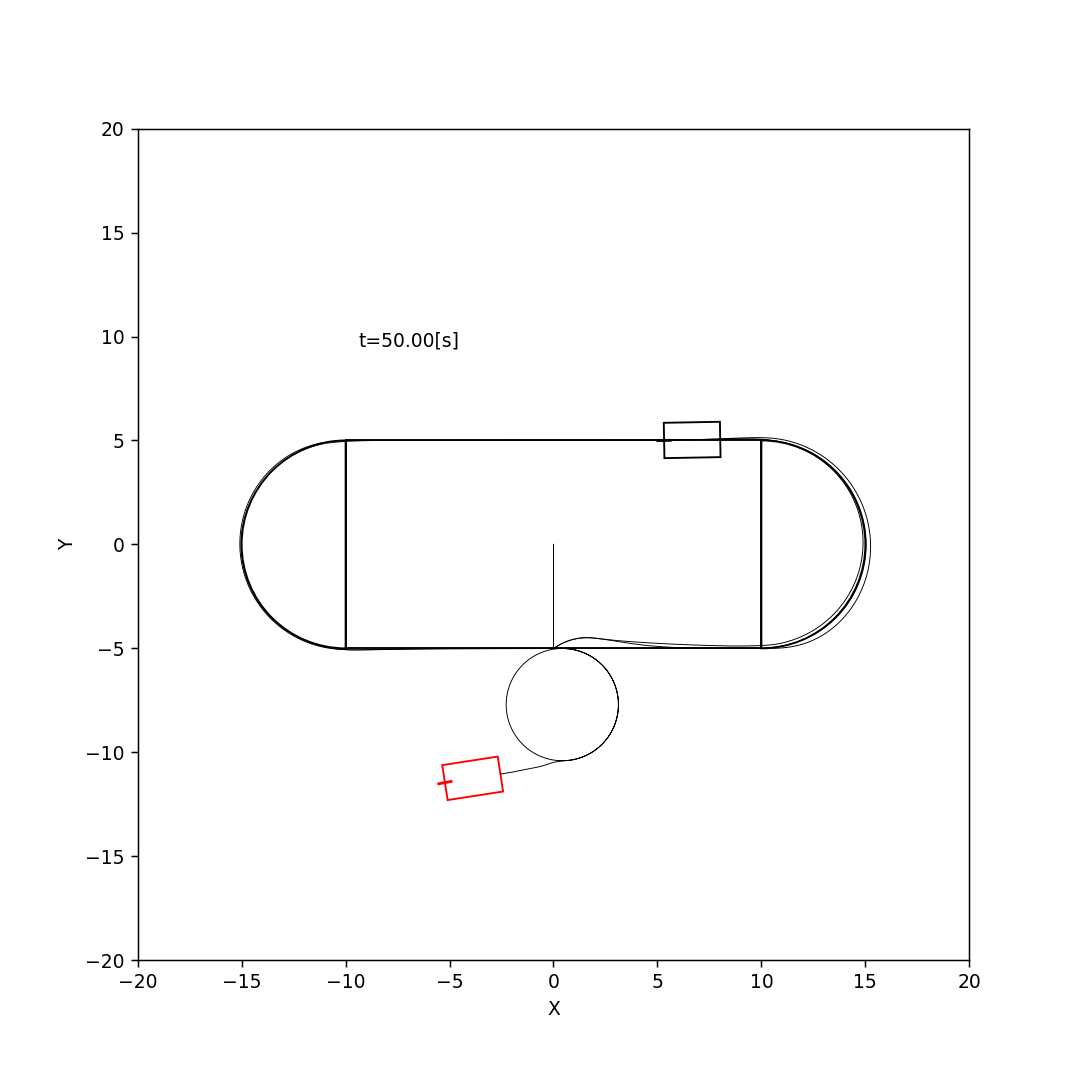

In [9]:
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.animation as anm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import kal_python as kal

Q = np.diag([10.0, 1.0])
R = np.diag([10.0])


if __name__ == '__main__':
    c = kal.course.course(5,20)
    x_start=np.array([0,-c.R,np.pi/6])
    straight = kal.vehicle_kinematics.agent_for_PID(np.array([2.0,np.pi/6]))
    #circle = kal.agent_base.agent(np.array([1.0,np.pi/6]))
    circle = kal.mpc.agent_for_MPC(np.array([2.0,np.pi/6]),20,Q,R,c)
    
    z = kal.vehicle_kinematics.vehicle(np.zeros(3),1.7,2.7,"black",straight,c)
    z2 = kal.vehicle_kinematics.vehicle(np.zeros(3),1.7,2.7,"red",circle,c)
  
    z.set_position(x_start)
    z2.set_position(x_start)
    
    world=kal.world.World(50,0.1)
    world.append(z)
    world.append(z2)
    world.append(c)
    world.draw()
    


In [2]:
import numpy as np
import cvxpy as cp  # pip install cvxpy

# 変数
x_1 = cp.Variable()
x_2 = cp.Variable()

# 最小化したい関数 (目的関数)
objective = cp.Minimize(
    cp.power(x_1, 2) + 2 * cp.power(x_2, 2)
)

# 制約条件 (不等式制約)
constraints = [
    x_2 >= - x_1 + 1,
    x_2 >= (x_1 - 1) / 2.0
]

# 問題を定義
problem = cp.Problem(objective, constraints)

# 最適化 (戻り値は最適化後に得られた値=最小値)
result = problem.solve()
print(result)  # 0.6666666666666667

# 最小値の時のx_1とx_2の値
print(x_1.value, x_2.value)  # 0.6666666666666667 0.33333333333333337

# 最小値の時のラグランジュ定数
print(constraints[0].dual_value, constraints[1].dual_value)  # 1.3333333333333337 0.0

0.6666666666666667
0.6666666666666667 0.33333333333333337
1.3333333333333337 0.0
